In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
cnt, PNG, UNDERBAR = 0, ' .png', '_'
CHART_NAME = 'scatterPlotExam'
filename = './../data/mpg.csv'
plt.style.use('ggplot')

print('스타일 목록')
print(plt.style.available)

스타일 목록
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
mpg = pd.read_csv(filename, encoding= 'utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


scatterPlotExam_01 .png파일이 저장되었습니다.


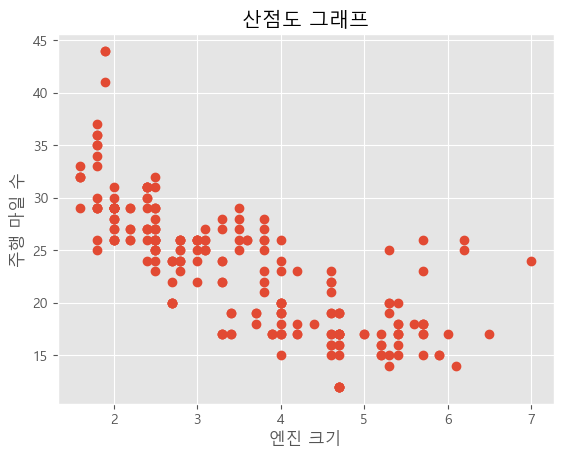

In [6]:
xdata = mpg.loc[:,['displ']]
ydata = mpg.loc[:, ['hwy']]

plt.figure()
plt.plot(xdata, ydata, marker = 'o', linestyle = 'None')
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일 수")
plt.title("산점도 그래프")
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')

plt.show()

In [7]:
# 항목을 구분한 색상 리스트
mycolors = ['r', 'g', 'b']
# 해당 구동 방식을 한글 이름으로 변경하기 위한 사전
label_dict = {'f':'전륜 구동', '4': '사륜 구동', 'r':'후륜 구동'}

scatterPlotExam_02 .png파일이 저장되었습니다.


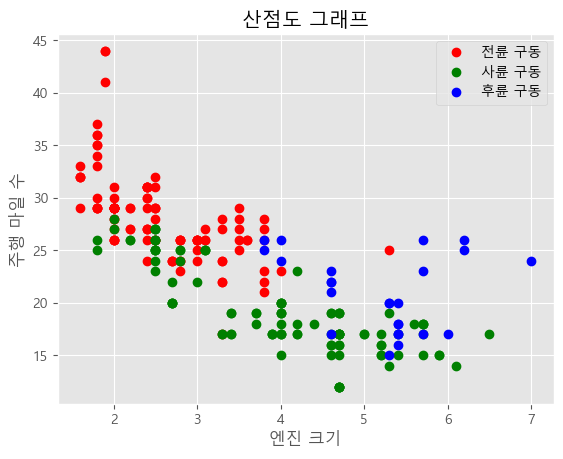

In [8]:
plt.figure()

# 색상 구분을 위한 카운터 변수
idx = 0

# ['f' '4' 'r']
labels = mpg['drv'].unique()

for finditem in labels:
    xdata = mpg.loc[mpg['drv'] == finditem, 'displ']
    ydata = mpg.loc[mpg['drv'] == finditem, 'hwy']
    plt.plot(xdata, ydata, color=mycolors[idx], marker = 'o', linestyle = 'None', 
    label = label_dict[finditem])
    idx += 1

plt.legend()
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일 수")
plt.title(" 산점도 그래프 ")
plt.grid(True)

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')

plt.show()

scatterPlotExam_05 .png파일이 저장되었습니다.


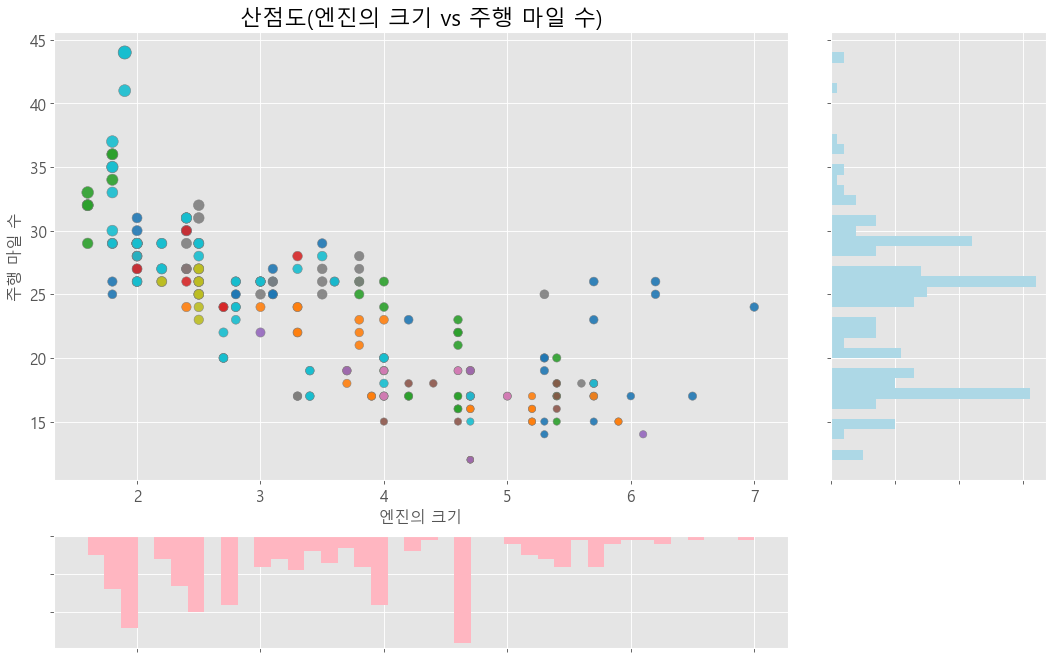

In [18]:
#Create Fig and gridspec
fig = plt.figure(figsize = (16, 10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

#축을 정의
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

#메인 그래프 산점도
#                                마커의 크기(size): 도시 연비(cty)에 4를 곱해 크기 조절 // 마커의 색상(color): 제조사별로 카테고리 코드를 부여해 색상 구분
ax_main.scatter ('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').
    #          투명도: 0.9 (약간 투명하게 하여 겹친 부분 확인 가능), # cmpa(컬러맵): 10가지 색상을 제공하는 'tab10' 팔레트 사용
    cat.codes, alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

#하단 histogram
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation = 'vertical', color = 'lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation = 'horizontal', color = 'lightblue')


# 데코
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일 수)', xlabel = '엔진의 크기', ylabel = '주행 마일 수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)
xlabels = ax_main.get_xticks().tolist()

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + '파일이 저장되었습니다.')

plt.show()